In [166]:
import pandas as pd
df = pd.read_csv('/Users/kaiyang/Desktop/employeedata.csv')
df

,id,gender,bdate,educ,jobcat,salary,salbegin,jobtime,prevexp,minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0
...,...,...,...,...,...,...,...,...,...,...
469,470,m,1/22/1964,12,1,26250,15750,64,69,1
470,471,m,8/3/1966,15,1,26400,15750,64,32,1
471,472,m,2/21/1966,15,1,39150,15750,63,46,0
472,473,f,11/25/1937,12,1,21450,12750,63,139,0


In [168]:
list(df.columns)

['id',
 'gender',
 'bdate',
 'educ',
 'jobcat',
 'salary',
 'salbegin',
 'jobtime',
 'prevexp',
 'minority']

In [170]:
df.rename(columns={'id': 'ID', 'gender': "Gender",
                    'bdate': 'Bdate', 'educ': 'Educ', 
                    'jobcat': 'Jobcat','salary':'Salary','salbegin':'Salbegin','jobtime':'Jobtime','prevexp':'Prevexp','minority':'Minority'}, inplace=True)
df.head()

,ID,Gender,Bdate,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
0,1,m,2/3/1952,15,3,57000,27000,98,144,0
1,2,m,5/23/1958,16,1,40200,18750,98,36,0
2,3,f,7/26/1929,12,1,21450,12000,98,381,0
3,4,f,4/15/1947,8,1,21900,13200,98,190,0
4,5,m,2/9/1955,15,1,45000,21000,98,138,0


In [172]:
df['Gender'] = df['Gender'].astype('category')
df.describe(include='category')

,Gender
count,474
unique,2
top,m
freq,258


In [174]:
list(df.columns)

['ID',
 'Gender',
 'Bdate',
 'Educ',
 'Jobcat',
 'Salary',
 'Salbegin',
 'Jobtime',
 'Prevexp',
 'Minority']

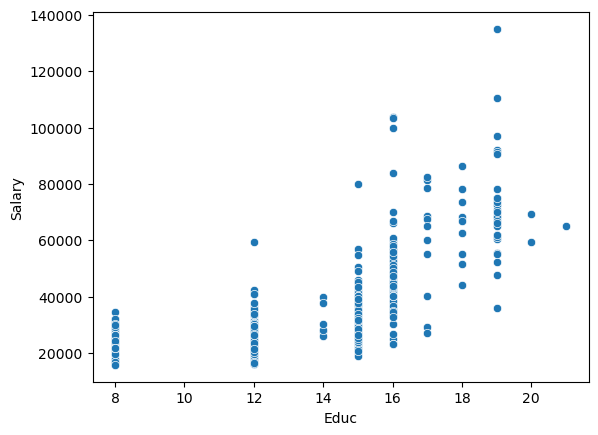

In [176]:
import seaborn as sns
sns.scatterplot(x="Educ", y="Salary", data=df);

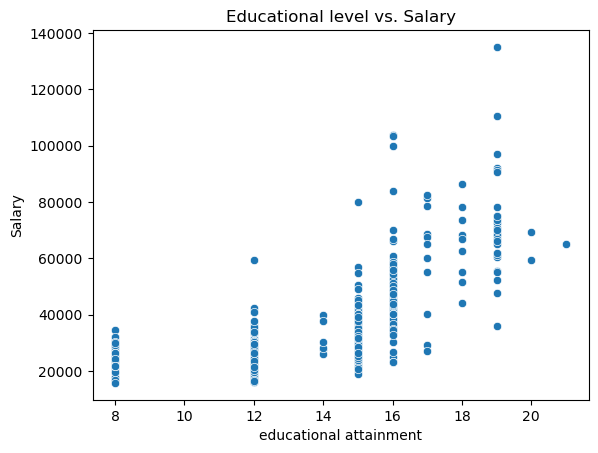

In [178]:
ax = sns.scatterplot(x="Educ", y="Salary", data=df)
ax.set_title("Educational level vs. Salary")
ax.set_xlabel("educational attainment");

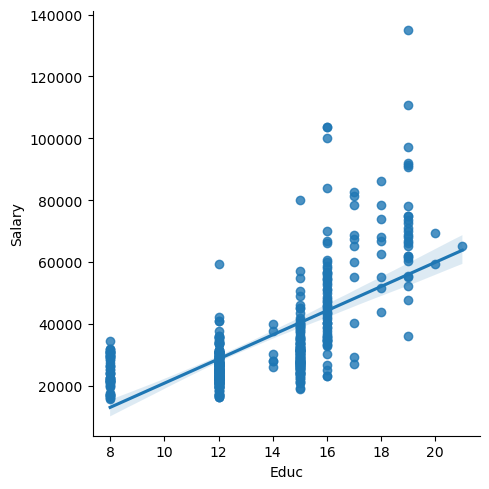

In [180]:
sns.lmplot(x="Educ", y="Salary", data=df);

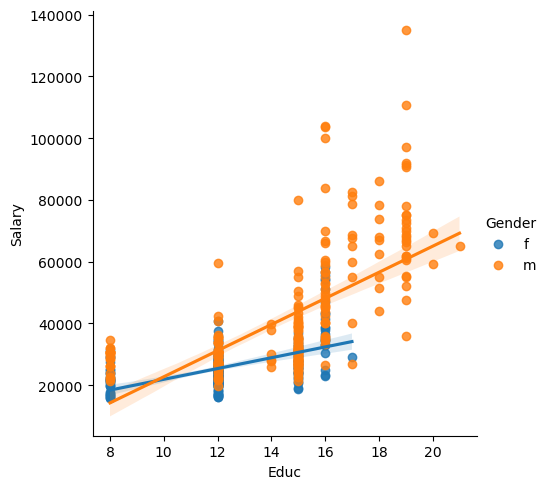

In [182]:
sns.lmplot(x="Educ", y="Salary", hue="Gender", data=df);

In [184]:
from scipy import stats
stats.pearsonr(df['Salary'], df['Educ'])

PearsonRResult(statistic=0.6605589090469418, pvalue=9.639741228235559e-61)

In [186]:
df['Gender'].unique()

['m', 'f']
Categories (2, object): ['f', 'm']

In [188]:
df['Gender'] = np.where(df['Gender'] == "m", 1, 0)
df['Gender'] = df['Gender'].astype(int)
df.head(15)

,ID,Gender,Bdate,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
0,1,1,2/3/1952,15,3,57000,27000,98,144,0
1,2,1,5/23/1958,16,1,40200,18750,98,36,0
2,3,0,7/26/1929,12,1,21450,12000,98,381,0
3,4,0,4/15/1947,8,1,21900,13200,98,190,0
4,5,1,2/9/1955,15,1,45000,21000,98,138,0
5,6,1,8/22/1958,15,1,32100,13500,98,67,0
6,7,1,4/26/1956,15,1,36000,18750,98,114,0
7,8,0,5/6/1966,12,1,21900,9750,98,0,0
8,9,0,1/23/1946,15,1,27900,12750,98,115,0
9,10,0,2/13/1946,12,1,24000,13500,98,244,0


In [190]:
df_without_bdate = df.drop(columns=['Bdate'])
cormat = df_without_bdate.corr()
round(cormat, 2)

,ID,Gender,Educ,Jobcat,Salary,Salbegin,Jobtime,Prevexp,Minority
ID,1.00,-0.08,-0.06,-0.01,-0.10,0.01,-1.00,-0.00,-0.03
Gender,-0.08,1.00,0.36,0.38,0.45,0.46,0.07,0.16,0.08
Educ,-0.06,0.36,1.00,0.51,0.66,0.63,0.05,-0.25,-0.13
Jobcat,-0.01,0.38,0.51,1.00,0.78,0.75,0.01,0.06,-0.14
Salary,-0.10,0.45,0.66,0.78,1.00,0.88,0.08,-0.10,-0.18
Salbegin,0.01,0.46,0.63,0.75,0.88,1.00,-0.02,0.05,-0.16
Jobtime,-1.00,0.07,0.05,0.01,0.08,-0.02,1.00,0.00,0.05
Prevexp,-0.00,0.16,-0.25,0.06,-0.10,0.05,0.00,1.00,0.14
Minority,-0.03,0.08,-0.13,-0.14,-0.18,-0.16,0.05,0.14,1.00
